# Facebook's Prophet Library

## Importing the data

👇 Go on [trends.google.com](https://trends.google.com/trends/?geo=US) and retrieve the dataset representing the interest over time of the keyword `data science` since 2004 in the US. Once you get the dataset, import the data and display the first few rows

In [1]:
# YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1GTup48HKTMqT9ZWI02vG65thl7zEBPLK')

In [2]:
df.head(5)

,Month,data science: (United States)
0,2004-01,17
1,2004-02,13
2,2004-03,11
3,2004-04,6
4,2004-05,6


## Display the data

👇Visualize the data by displaying the first few rows of the dataframe

In [3]:
# YOUR CODE HERE
df.tail()

,Month,data science: (United States)
195,2020-04,82
196,2020-05,80
197,2020-06,78
198,2020-07,77
199,2020-08,62


## Data Preprocessing

Facebook'Prophet library requires the data to be in a specific format

👇 Format the dataset as per Facebook Prophet's requirements.
Remember the dataframe should have a `ds` and `y` columns

In [12]:
# YOUR CODE HERE
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2004-01-01,17
1,2004-02-01,13
2,2004-03-01,11
3,2004-04-01,6
4,2004-05-01,6


## Plotting the data

👇 Plot the data

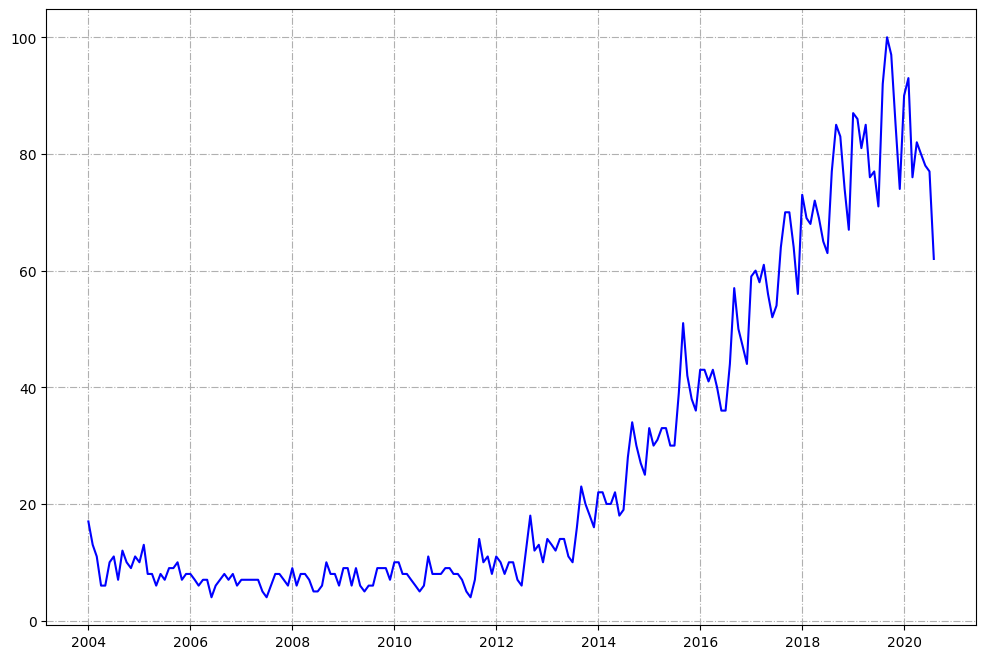

In [17]:
# YOUR CODE HERE
plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(df['ds'], df['y'], 'b')
plt.show()

## Fitting the data

👇 Fit the data using Facebook's Prophet library. Make sure to use a train/test split. 


In [14]:
# YOUR CODE HERE
df.shape

(200, 2)

In [19]:
! pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 2.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.9/499.9 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 33.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.7 MB/s eta 0:00:0000:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=731999 sha256=fc65c35b5fab5fe8e33267eb2c608ada1a85536cc216bf41b71675016b141fbd
  Stored in directory: /Users/bita/Library/Caches/pip/wheels/c2/3a/3d/11734e652782d3f823a08aae1c452e887eb16349750cca3f8a
Successfully built pymeeus


In [20]:
from prophet import Prophet
train = df.iloc[:176]
test = df.iloc[176:]

In [21]:
train.shape, test.shape

((176, 2), (24, 2))

In [22]:
train

,ds,y
0,2004-01-01,17
1,2004-02-01,13
2,2004-03-01,11
3,2004-04-01,6
4,2004-05-01,6
...,...,...
171,2018-04-01,72
172,2018-05-01,69
173,2018-06-01,65
174,2018-07-01,63


In [23]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

23:28:30 - cmdstanpy - INFO - Chain [1] start processing
23:28:32 - cmdstanpy - INFO - Chain [1] done processing


## Make future predictions

👇Before predicting future values with Facebook's Prophet library, you first need to create a placeholder dataframe that will eventually hold the predictions. Once you create the dataframe, try to predict 2 years in the future.

You can create the predictions' dataframe using `make_future_dataframe()`

In [24]:
# YOUR CODE HERE
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
207,2021-04-01,109.266884,103.193439,115.460982
208,2021-05-01,102.497032,96.525470,108.625611
209,2021-06-01,93.945888,88.171929,99.695007
210,2021-07-01,93.458962,87.392751,99.504405
211,2021-08-01,113.184873,106.145553,119.622798


## Plotting the forecast

👇 It's time to visualize our forecast. Try to first plot it using [`model.plot(forecast)`](https://facebook.github.io/prophet/docs/quick_start.html)

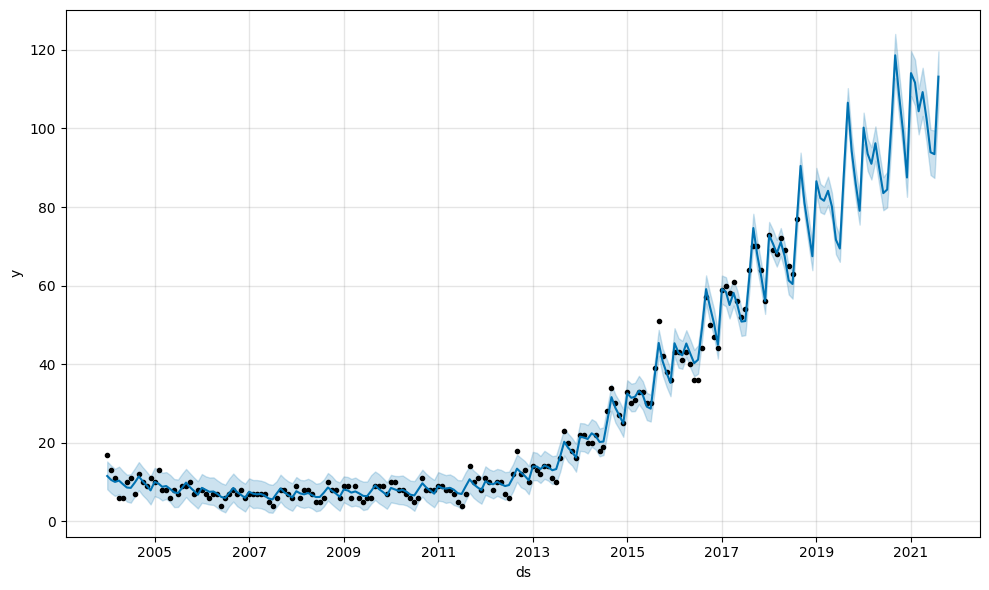

In [25]:
# YOUR CODE HERE
ax = model.plot(forecast);

👉 From 2004 to 2018 we can see the train data and the forecasted data from 2018 to 2020.

We can also notice a shaded region behind the plot which represents the 95% uncertainty interval.

The black dots represent the original data

## Time Series' trend and seasonality

👇 Plot the trend and yearly seasonality of the time series. This can be done using the `plot_components()` function from Facebook's Prophet Library

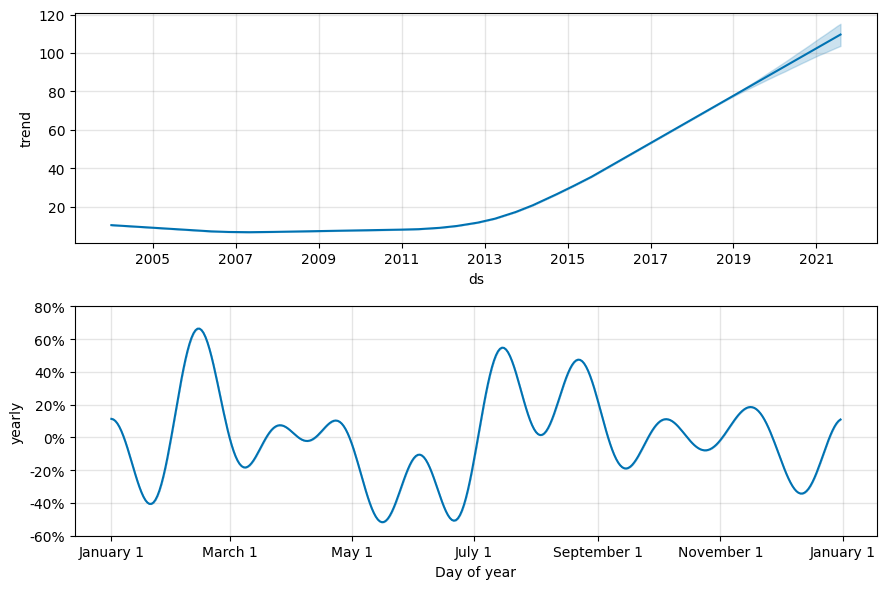

In [26]:
# YOUR CODE HERE
model.plot_components(forecast);

## Evaluating the model with cross-validation!

👇 Using `cross_validation()` and `performance_metrics()` from [prophet.diagnostics](https://facebook.github.io/prophet/docs/diagnostics.html), evaluate the performance of your model

More precisely, create a Time Series K-fold CV with
- train sets of size 5 years
- horizon val sizes of 1 years
- shifting each fold by 180 days

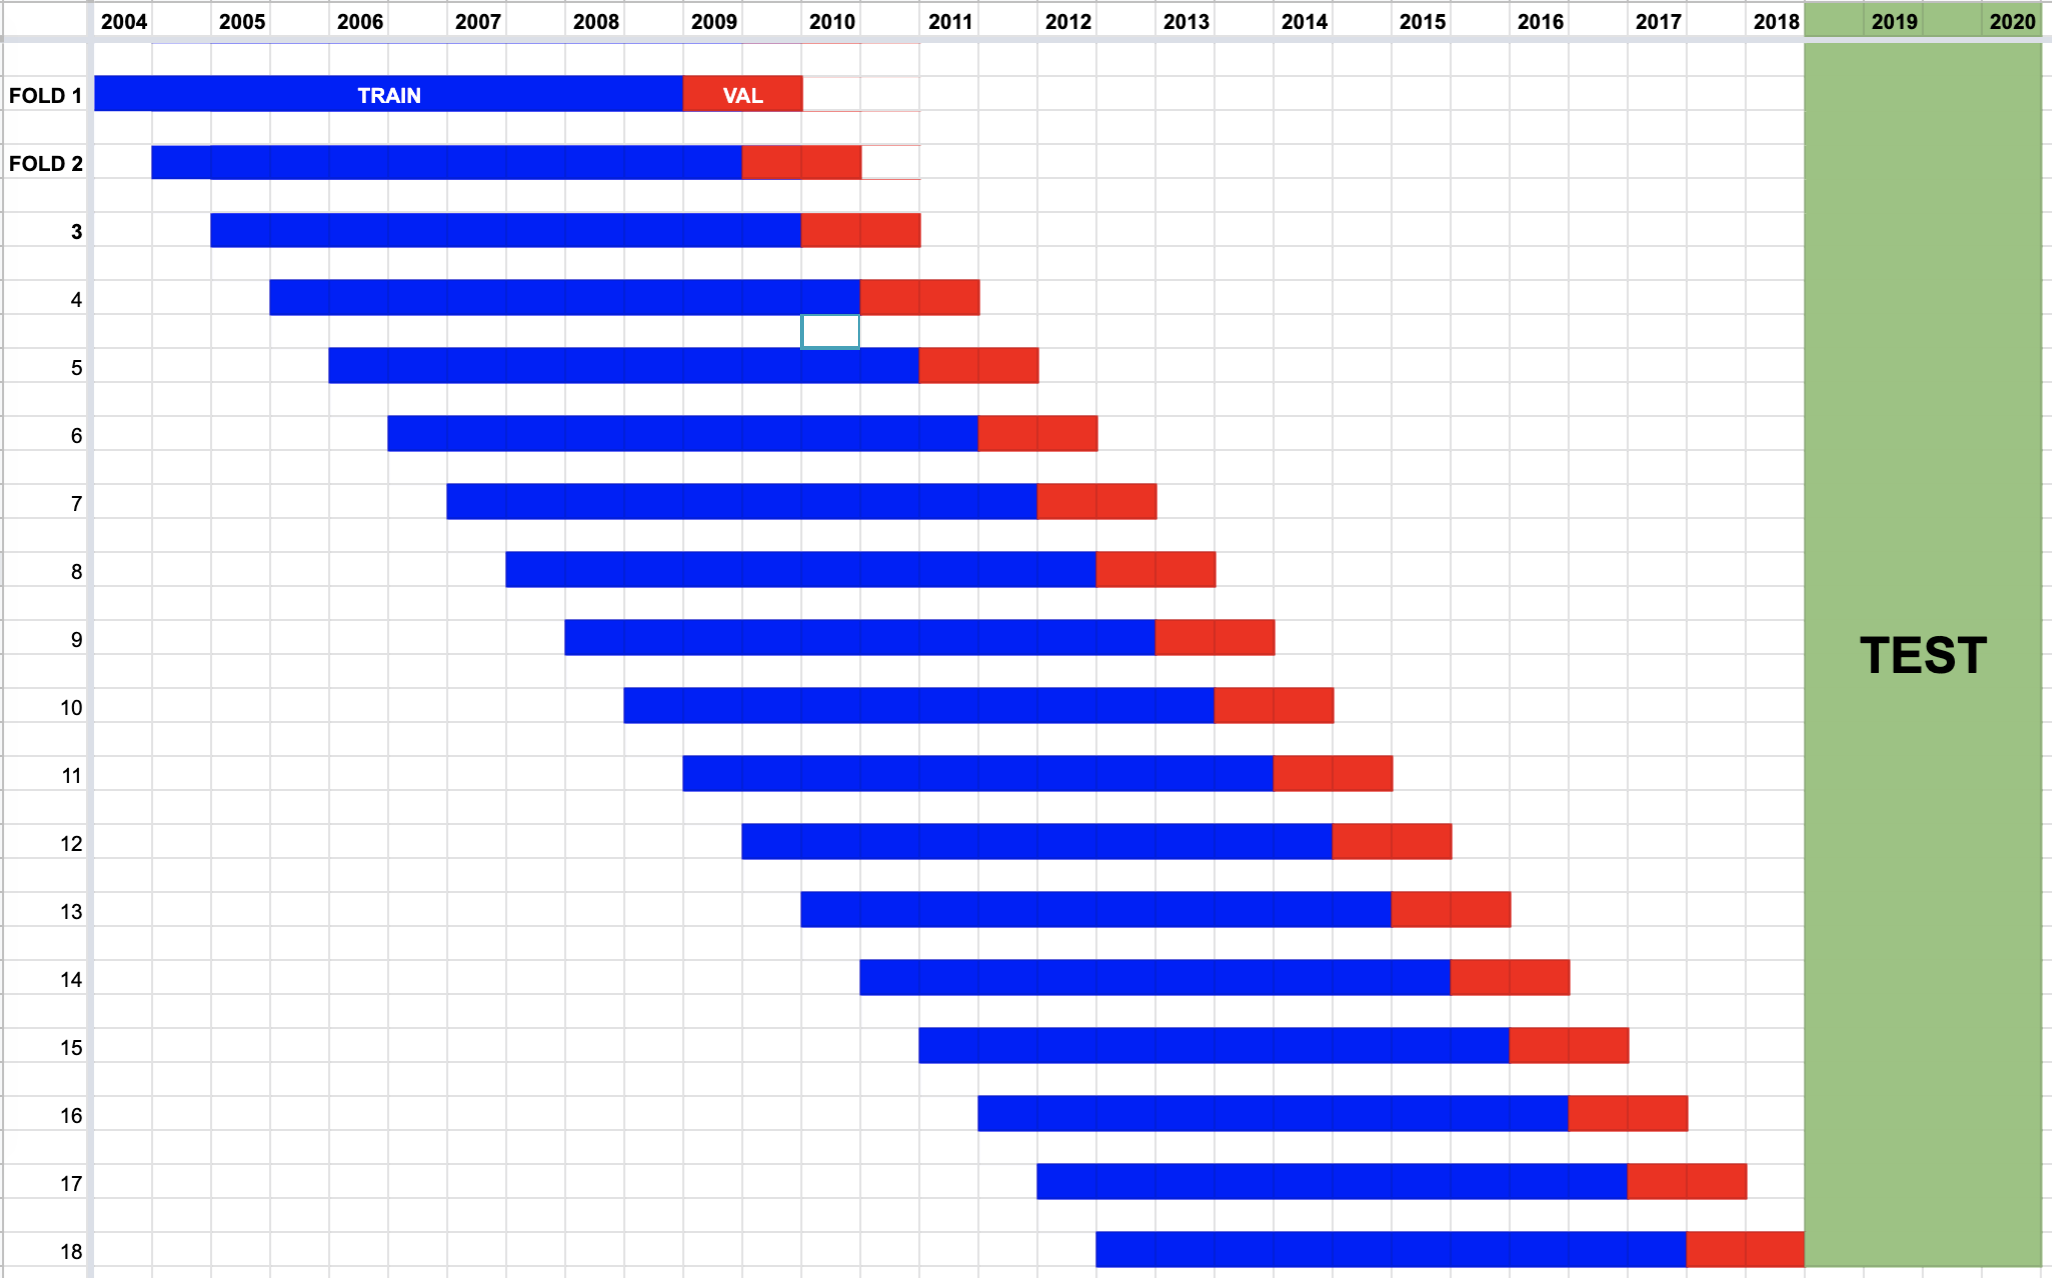

In [27]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [28]:
# YOUR CODE HERE
cv_results = cross_validation(model=model, initial=f'{365 * 5} days', horizon='365 days', period='180 days')
cv_results

  0%|          | 0/18 [00:00<?, ?it/s]

23:39:11 - cmdstanpy - INFO - Chain [1] start processing
23:39:11 - cmdstanpy - INFO - Chain [1] done processing
23:39:11 - cmdstanpy - INFO - Chain [1] start processing
23:39:12 - cmdstanpy - INFO - Chain [1] done processing
23:39:12 - cmdstanpy - INFO - Chain [1] start processing
23:39:13 - cmdstanpy - INFO - Chain [1] done processing
23:39:13 - cmdstanpy - INFO - Chain [1] start processing
23:39:13 - cmdstanpy - INFO - Chain [1] done processing
23:39:14 - cmdstanpy - INFO - Chain [1] start processing
23:39:14 - cmdstanpy - INFO - Chain [1] done processing
23:39:14 - cmdstanpy - INFO - Chain [1] start processing
23:39:15 - cmdstanpy - INFO - Chain [1] done processing
23:39:15 - cmdstanpy - INFO - Chain [1] start processing
23:39:16 - cmdstanpy - INFO - Chain [1] done processing
23:39:16 - cmdstanpy - INFO - Chain [1] start processing
23:39:16 - cmdstanpy - INFO - Chain [1] done processing
23:39:16 - cmdstanpy - INFO - Chain [1] start processing
23:39:16 - cmdstanpy - INFO - Chain [1]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2009-04-01,5.751318,3.491815,7.831564,9,2009-03-16
1,2009-05-01,5.326924,3.151451,7.319027,6,2009-03-16
2,2009-06-01,5.545936,3.512736,7.485708,5,2009-03-16
3,2009-07-01,5.753378,3.640935,7.843059,6,2009-03-16
4,2009-08-01,5.892882,3.816135,7.858272,6,2009-03-16
...,...,...,...,...,...,...
211,2018-04-01,69.129591,65.790206,73.023322,72,2017-08-01
212,2018-05-01,65.071075,61.384822,68.711169,69,2017-08-01
213,2018-06-01,57.524914,54.060991,61.261886,65,2017-08-01
214,2018-07-01,57.735690,54.090179,61.123351,63,2017-08-01


In [30]:
from prophet.plot import plot_cross_validation_metric

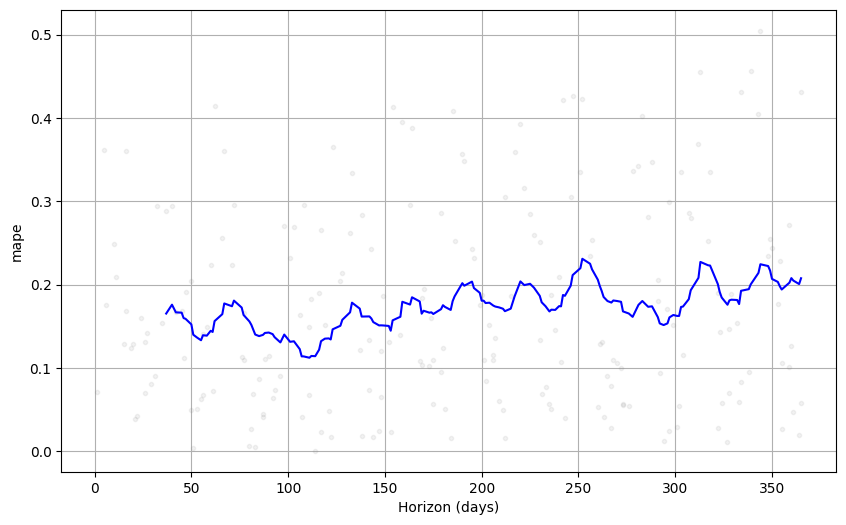

In [31]:
# YOUR CODE HERE
# Plot results below
plot_cross_validation_metric(cv_results, metric='mape');

⚠️ Don't forget to push the challenge to GitHub once you're done 😄